In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\hp\OneDrive\Alphabets_data.csv")

In [3]:
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [5]:
df.shape

(20000, 17)

In [6]:
df['letter'].value_counts()

letter
U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: count, dtype: int64

In [7]:
df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['encoded_letter'] = le.fit_transform(df['letter'])
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex,encoded_letter
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8,19
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,8
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,3
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,13
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7,3
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7,2
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4,19
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8,18


In [9]:
new_df = df.drop('letter',axis =1)
new_df

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex,encoded_letter
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8,19
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,8
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,3
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,13
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7,3
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7,2
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4,19
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8,18


In [10]:
from sklearn.model_selection import train_test_split
X = new_df.drop('encoded_letter',axis =1)
y = new_df['encoded_letter']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size  =  0.2,random_state = 42)

# Model Implementation

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential model
model = Sequential()

# Input layer with the number of input features (X_train.shape[1])
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Hidden layer with 64 neurons

# Output layer: Assuming 26 classes (A-Z), use softmax for multi-class classification
model.add(Dense(26, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Define the parameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(64,), (128,), (64, 64)],  # Example layer configurations
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01]
}

# Initialize the model and GridSearchCV
ann = MLPClassifier(max_iter=500)
grid_search = GridSearchCV(ann, param_grid, cv=3)

# Fit grid search
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Best Parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (128,), 'learning_rate_init': 0.001, 'solver': 'adam'}


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions
y_pred = model.predict(X_test)

# Convert predictions to class labels (if needed)
y_pred_classes = y_pred.argmax(axis=-1)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step
Accuracy: 0.016
Precision: 0.0016965359714278356
Recall: 0.016
F1-Score: 0.0030389384949325382


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1902 - loss: 3.3148 - val_accuracy: 0.5855 - val_loss: 1.4890
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - accuracy: 0.6280 - loss: 1.3574 - val_accuracy: 0.6837 - val_loss: 1.1575
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - accuracy: 0.6920 - loss: 1.1113 - val_accuracy: 0.7533 - val_loss: 0.9727
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - accuracy: 0.7386 - loss: 0.9642 - val_accuracy: 0.7613 - val_loss: 0.9009
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.7576 - loss: 0.8741 - val_accuracy: 0.7742 - val_loss: 0.8443
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - accuracy: 0.7751 - loss: 0.8201 - val_accuracy: 0.7908 - val_loss: 0.7743
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - accuracy: 0.7852 - loss: 0.7731 - val_accuracy: 0.8077 - val_loss: 0.7396
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - accuracy: 0.7945 - loss: 0.7366 - va

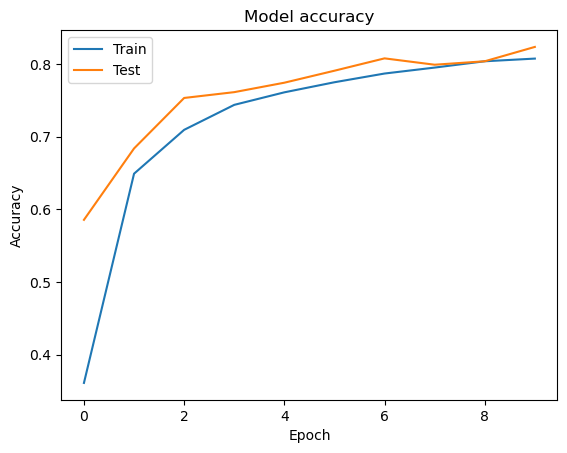

In [19]:
import matplotlib.pyplot as plt

# Train your model and save the history
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()